In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [3]:
df = pd.read_csv("Phishing.csv")

<h2>View Data</h2>


In [4]:
#print number of rows and columns in dataframe
df.shape

(10000, 50)

In [5]:
unique=df.nunique().sort_values(ascending=True).reset_index()
unique

,index,0
0,HttpsInHostname,1
1,DoubleSlashInPath,2
2,EmbeddedBrandName,2
3,ExtFavicon,2
4,InsecureForms,2
5,RelativeFormAction,2
6,ExtFormAction,2
7,AbnormalFormAction,2
8,FrequentDomainNameMismatch,2
9,FakeLinkInStatusBar,2


In [6]:
# Display the number of missing values in each column in descending order
null=df.isnull().sum().sort_values(ascending = False)
null

id                                    0
RightClickDisabled                    0
PctExtHyperlinks                      0
PctExtResourceUrls                    0
ExtFavicon                            0
InsecureForms                         0
RelativeFormAction                    0
ExtFormAction                         0
AbnormalFormAction                    0
PctNullSelfRedirectHyperlinks         0
FrequentDomainNameMismatch            0
FakeLinkInStatusBar                   0
PopUpWindow                           0
NumDots                               0
SubmitInfoToEmail                     0
IframeOrFrame                         0
MissingTitle                          0
ImagesOnlyInForm                      0
SubdomainLevelRT                      0
UrlLengthRT                           0
PctExtResourceUrlsRT                  0
AbnormalExtFormActionR                0
ExtMetaScriptLinkRT                   0
PctExtNullSelfRedirectHyperlinksRT    0
EmbeddedBrandName                     0


In [7]:
df.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [8]:
df.tail()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
9995,9996,3,1,1,50,0,0,0,0,0,...,0,0,0,1,1,-1,1,0,1,0
9996,9997,2,1,4,59,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
9997,9998,2,1,4,57,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
9998,9999,3,1,1,49,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
9999,10000,3,1,2,52,3,0,0,0,0,...,0,0,0,1,1,1,1,1,1,0


In [9]:
df.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10000.00000,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

<h2>Convert Data</h2>

In [11]:
float_cols = df.select_dtypes('float64').columns
for c in float_cols:
    df[c] = df[c].astype('float32')
    
int_cols = df.select_dtypes('int64').columns
for c in int_cols:
    df[c] = df[c].astype('int32')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int32  
 1   NumDots                             10000 non-null  int32  
 2   SubdomainLevel                      10000 non-null  int32  
 3   PathLevel                           10000 non-null  int32  
 4   UrlLength                           10000 non-null  int32  
 5   NumDash                             10000 non-null  int32  
 6   NumDashInHostname                   10000 non-null  int32  
 7   AtSymbol                            10000 non-null  int32  
 8   TildeSymbol                         10000 non-null  int32  
 9   NumUnderscore                       10000 non-null  int32  
 10  NumPercent                          10000 non-null  int32  
 11  NumQueryComponents                  10000 

<h2>Check Balance/Imbalance Data</h2>

<AxesSubplot:>

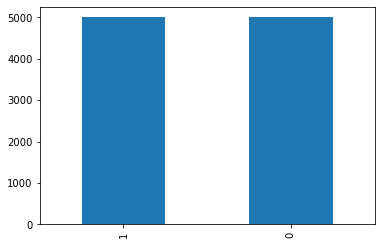

In [12]:
df['CLASS_LABEL'].value_counts().plot(kind='bar')

<h2> Spearman Corealtion </h2>

In [13]:
def corr_heatmap(df, idx_s, idx_e):
    y = df['CLASS_LABEL']
    plt.figure(figsize = (10,9))
    temp = df.iloc[:, idx_s:idx_e]
    if 'id' in temp.columns:
        del temp['id']
    temp['CLASS_LABEL'] = y
    sns.heatmap(temp.corr(), annot=True, fmt='.2f')
    plt.show()

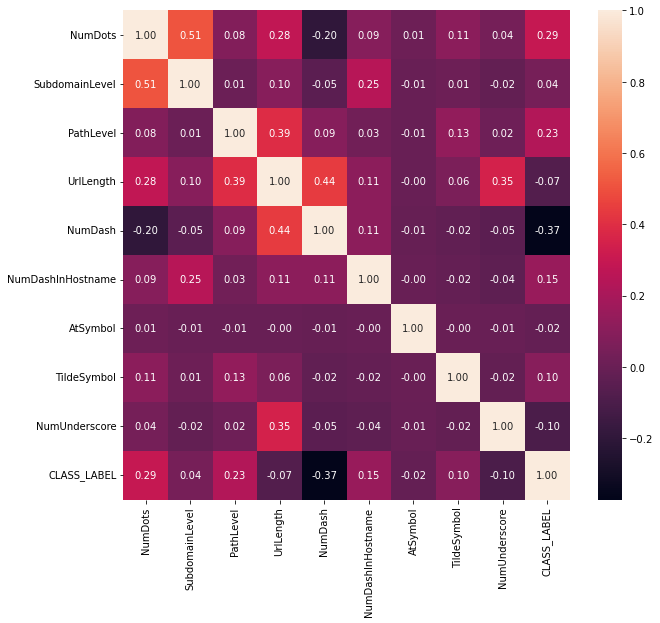

In [14]:
corr_heatmap(df, 0, 10)

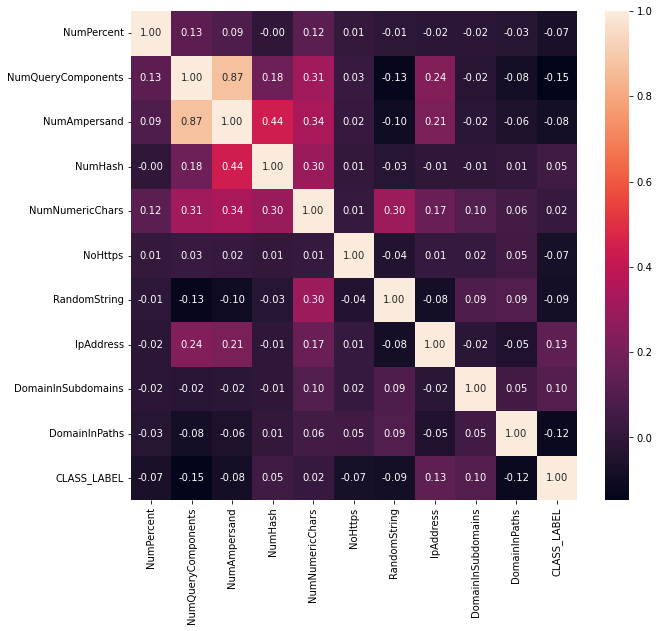

In [15]:
corr_heatmap(df, 10, 20)

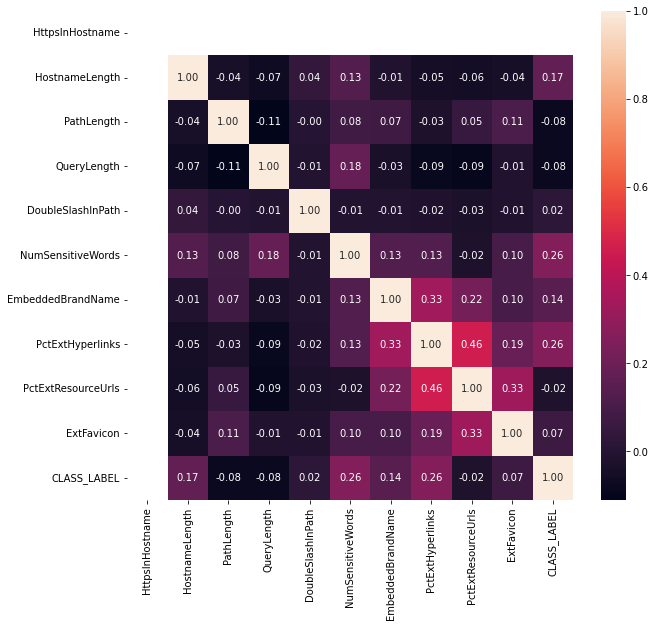

In [16]:
corr_heatmap(df, 20, 30)

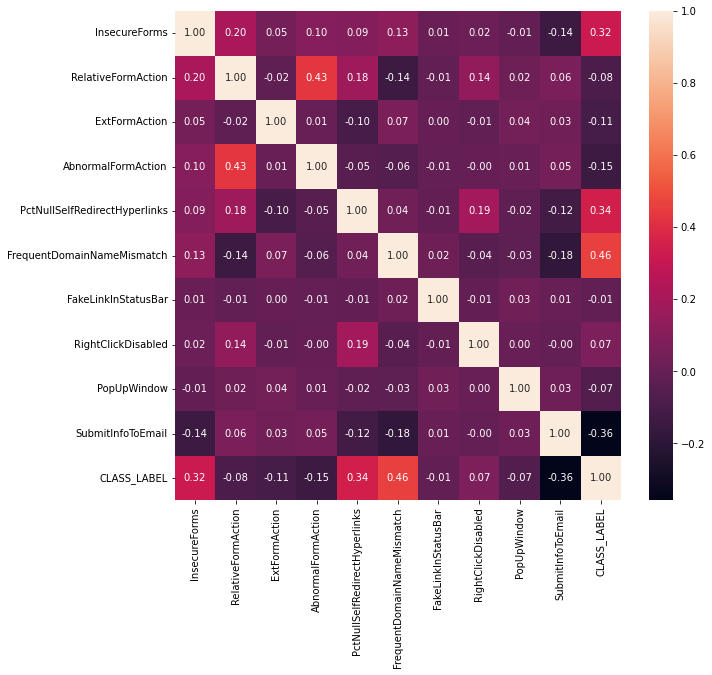

In [17]:
corr_heatmap(df, 30, 40)

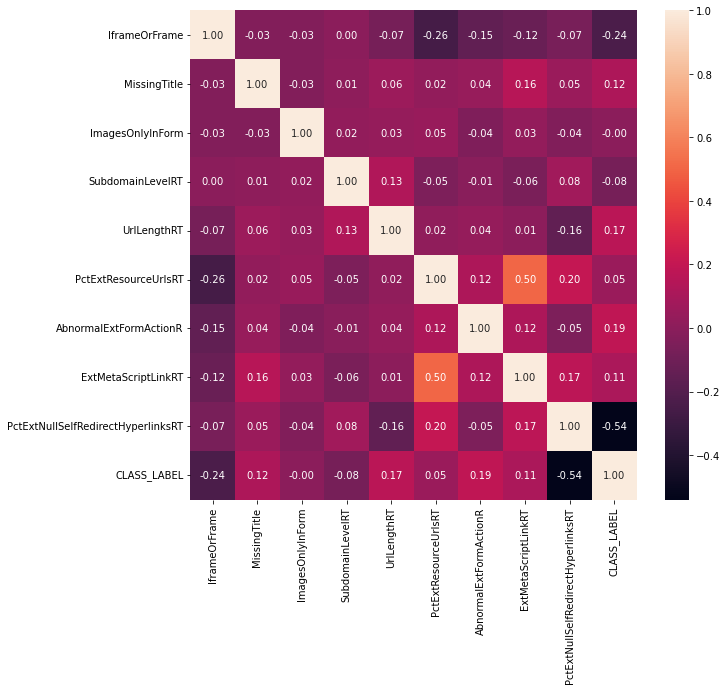

In [18]:
corr_heatmap(df, 40, 50)

In [29]:
X = df.drop('CLASS_LABEL' , axis = 1 )
y = df['CLASS_LABEL']

X_train ,X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state =33
                                                     )
X_test

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
5672,5673,4,2,4,180,1,0,0,0,0,...,0,1,0,0,0,-1,1,1,1,1
3346,3347,2,1,4,46,1,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
5867,5868,1,0,4,106,4,0,0,0,0,...,0,0,0,0,1,-1,1,1,0,1
2322,2323,3,1,3,61,0,0,0,0,1,...,0,1,0,0,1,0,1,0,1,-1
5233,5234,2,1,3,138,15,0,0,0,2,...,0,1,0,0,1,-1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7447,7448,2,0,2,141,0,0,0,0,1,...,0,0,0,0,1,-1,1,1,0,1
954,955,2,0,1,32,1,1,0,0,0,...,0,0,1,0,1,1,1,1,1,1
6708,6709,2,1,3,111,9,0,0,0,0,...,0,1,0,0,1,-1,-1,1,0,0
4213,4214,4,0,10,94,0,0,0,0,0,...,0,1,0,0,1,-1,-1,1,-1,-1


In [30]:
lr = LogisticRegression(max_iter=100000)
lr.fit(X_train, y_train) 
predlog = lr.predict(X_test)
acc_log = accuracy_score(y_test , predlog)*100
acc_log

99.96666666666667

In [31]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
pred_gb = gaussian.predict(X_test)
acc_gb = accuracy_score(y_test , pred_gb)*100
acc_gb


92.06666666666666

In [32]:
models = pd.DataFrame({
    'Model': ['Logistic Regression' ,'Gaussian Naive Bayes'],
    'Score': [acc_log , acc_gb ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,99.966667
1,Gaussian Naive Bayes,92.066667
